# 2019 Fordgobike Dataset Exploration and Visualization
## by Abdishakur Yoonis

## Preliminary Wrangling

> We will investigate **Ford GoBike System Dataset**, assess its quality and tidiness, then clean it that ’s which called data wrangling. We will document our wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries).


>**Ford GoBike System Dataset**  includes information about individual rides made
in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('darkgrid')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Data Gathering

> We will load our dataset and describe its properties.

### Importing the data 

In [2]:
# Collecting Data from the fordgobike-tripdata
gobikes = pd.read_csv('201902-fordgobike-tripdata.csv')
gobikes.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [3]:
# Displaying the structure of Data including rows and columns
gobikes.shape

(183412, 16)

#### So, our data consists of 183,412 row (records) and 16 columns

## Assessing The Data

**We are looking for Two main things:**
 - Data’s Quality (There are no missing data, invalid data, inaccurate data, inconsistent data,...etc)
 - Data’s Tidiness 
 
**We have two Types of Assessment:**
 - Visual Assessment
 - Programmatic Assessment

In [4]:
# Showing the data in the dataframe
gobikes

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


**Data Quality issues** "Data has issues with content such as missing , duplicate or incorrect data"


We notice that some columns have a lot of missing values (NaN) as follow:
- member_birth_year,	member_gender


**Tidiness** "Data has stuctural issues"
- We notice that there is no column contains Trip duration in mins , user age. 


### Programmatic Assessment

In [5]:
# Showing a summary of contents of each column and number of null values in each column in our dataframe
gobikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
# Displaying the data type of each column.
gobikes.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [7]:
# Listing the names of columns in the dataset
list(gobikes.columns)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip']

In [8]:
# Generating the descriptive statistics of the data
gobikes.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:
# Detecting missing values of the data
gobikes.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

We notice that there are missing values in the following columns:
   - member_birth_year, member_gender.
   - start_station_id , start_station_name , end_station_id, end_station_name.

In [10]:
# Checking any duplicated at the data
gobikes.duplicated().sum()

0

We notice that <font color='Green'>there is no duplicate records. </font>

In [11]:
# Getting method of user_type containing counts of unique values. 
gobikes.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [12]:
# Getting method of member_gender containing counts of unique values. 
gobikes.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [13]:
# Getting method of bike_share_for_all_trip containing counts of unique values. 
gobikes.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [14]:
# Getting method of end_station_name containing counts of unique values. 
gobikes.end_station_name.value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
21st Ave at International Blvd                                  6
16th St Depot                                                   6
Willow St at Vine St                                            5
Name: end_station_name, Length: 329, dtype: int64

### Assesing Data Summary

### Total Quality Issues:

- start_time, end_time shoud be in datetime not object.
- start_station_name, end_station_name shoud be in string not object.
- member_gender, user_type into Category not Object.

- our claim through visual assesment of missing values is confirmed as:
 - We found about 8000+ missing value in the following columns: 
   - member_birth_year, member_gender.
- We found about 197 missing value in the following columns: 
   - start_station_id , start_station_name , end_station_id, end_station_name.
   

### Total Tidiness issues:
 - There is no column which contains the trip duration in mins and user age.
 - the Trip start time should be separated into two columns as follow: 
   - Trip start hour of the day , Trip start day of the week.

### Data Cleaning:
We will trim and clean our dataset for analysis
depending on our Analysis we will need to do the following:

- convert the null values in following columns to 'No data provided':
  - start_station_id , start_station_name , end_station_id, end_station_name, member_gender
- convert the null values in following columns to zero:
  - member_birth_year
- Adjust the Data types for the following columns: 
   - start_time, end_time, start_station_name, end_station_name, member_gender, user_type.
- Create a new column contains the trip duration in mins and user age.
- the Trip start time should be separated into two columns as follow: 
   - Trip start hour of the day , Trip start day of the week.

**We will replace Null values in the following columns with 'No data provided'** : start_station_id , start_station_name , end_station_id, end_station_name, member_gender.

In [15]:
gobikes['start_station_id'].fillna('No data provided', inplace = True)
gobikes['start_station_name'].fillna('No data provided', inplace = True)
gobikes['end_station_id'].fillna('No data provided', inplace = True)
gobikes['end_station_name'].fillna('No data provided', inplace = True)
gobikes['member_gender'].fillna('No data provided', inplace = True)

**We will replace Null values in the following columns with '0'** : member_birth_year.

In [16]:
#  Replacing Null values in this columns with '0' : member_birth_year.
gobikes['member_birth_year'].fillna('0', inplace = True)

In [17]:
# Showing these specific columns
print(gobikes[['start_station_id','end_station_id','end_station_name','start_station_name','member_birth_year','member_gender']].isnull().sum())

start_station_id      0
end_station_id        0
end_station_name      0
start_station_name    0
member_birth_year     0
member_gender         0
dtype: int64


We will notice that: **these columns do not have any missing values anymore**

In [18]:
# Showing the information about the dataset
gobikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183412 non-null  object 
 4   start_station_name       183412 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183412 non-null  object 
 8   end_station_name         183412 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        183412 non-null  object 
 14  memb

As a result, we identify: **There is not any missing value anymore throughout the whole dataframe.**

### Adjusting the datatypes for some variables 

In [19]:
gobikes['start_time'].head(10)

0    2019-02-28 17:32:10.1450
1    2019-02-28 18:53:21.7890
2    2019-02-28 12:13:13.2180
3    2019-02-28 17:54:26.0100
4    2019-02-28 23:54:18.5490
5    2019-02-28 23:49:58.6320
6    2019-02-28 23:55:35.1040
7    2019-02-28 23:41:06.7660
8    2019-02-28 23:41:48.7900
9    2019-02-28 23:49:47.6990
Name: start_time, dtype: object

In [20]:
# Adjusting start_time data type to date
gobikes['start_time'] =pd.to_datetime(gobikes['start_time'])
gobikes['start_time'][0]

Timestamp('2019-02-28 17:32:10.145000')

In [21]:
# Showing first ten row of the end_time column 
gobikes['end_time'].head(10)

0    2019-03-01 08:01:55.9750
1    2019-03-01 06:42:03.0560
2    2019-03-01 05:24:08.1460
3    2019-03-01 04:02:36.8420
4    2019-03-01 00:20:44.0740
5    2019-03-01 00:19:51.7600
6    2019-03-01 00:14:42.5880
7    2019-03-01 00:08:02.7560
8    2019-03-01 00:07:59.7150
9    2019-03-01 00:07:17.0250
Name: end_time, dtype: object

In [22]:
# Converting end_time data type to date
gobikes['end_time'] =pd.to_datetime(gobikes['end_time'])
gobikes['end_time'][0]

Timestamp('2019-03-01 08:01:55.975000')

In [23]:
# Converting some columns data type to string
gobikes['start_station_id'] = gobikes['start_station_id'].astype('str')
gobikes['end_station_id'] = gobikes['end_station_id'].astype('str')
gobikes['start_station_name'] = gobikes['start_station_name'].astype('str')
gobikes['end_station_name'] = gobikes['end_station_name'].astype('str')

In [24]:
# Converting member_birth_year columns data type to integer
gobikes['member_birth_year'] = gobikes['member_birth_year'].astype('int') 

In [25]:
# Converting user_type, member_gender data type to Category
gobikes['user_type'] = gobikes['user_type'].astype('category')
gobikes['member_gender'] = gobikes['member_gender'].astype('category')

### Create a new column contains the trip duration in mins

In [26]:
# Creating a new column contains the trip duration in mins
gobikes['duration_min']= gobikes['duration_sec']/60
gobikes['duration_min'].tail(10)

183402     2.033333
183403     4.150000
183404     4.266667
183405     1.850000
183406    11.766667
183407     8.000000
183408     5.216667
183409     2.350000
183410     2.316667
183411     4.516667
Name: duration_min, dtype: float64

### Create a new column contains User age

In [27]:
# Creating a new column contains User age
gobikes['user_age']= 2019- gobikes['member_birth_year'] 
gobikes['user_age'].tail(10)

183402    2019
183403      19
183404      39
183405      35
183406      31
183407      23
183408      35
183409      29
183410      31
183411      30
Name: user_age, dtype: int32

### Making separate columns for Hour and Day

In [28]:
# Making separate columns for Hour and Day
gobikes['start_date']= gobikes.start_time.dt.strftime("%m/%d/%y")
gobikes['Trip_day of the week'] = gobikes.start_time.dt.strftime('%A')
gobikes['Trip_hour of the day'] = gobikes.start_time.dt.strftime('%H')

In [29]:
# Displaying the data of gobikes
gobikes

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,user_age,start_date,Trip_day of the week,Trip_hour of the day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,869.750000,35,02/28/19,Thursday,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,0,No data provided,No,708.683333,2019,02/28/19,Thursday,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,No,1030.900000,47,02/28/19,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989,Other,No,608.166667,30,02/28/19,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,26.416667,45,02/28/19,Thursday,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,...,4832,Subscriber,1996,Male,No,8.000000,23,02/01/19,Friday,00
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,...,4960,Subscriber,1984,Male,No,5.216667,35,02/01/19,Friday,00
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,...,3824,Subscriber,1990,Male,Yes,2.350000,29,02/01/19,Friday,00
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,...,5095,Subscriber,1988,Male,No,2.316667,31,02/01/19,Friday,00


### Summary Statistics of your dataset as follow:

### What is the structure of your dataset?

> our dataset orginally consists of 183,412 row (records) and 16 columns and Most variables are numeric and concerns three major things as follow: 
  - Trip (duration_sec, start_time, end_time)
  - station (start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude)
  - User (bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip)
 
> After adjustment and cleaning process new columns were created to help in analyzing and expolring the data so, our dataset consists of 21 columns now and the new columns as follow:
 - Trip (duration_min, start_date, Trip_day of the week, Trip_hour of the day)
 - User (member_age)


### What is/are the main feature(s) of interest in your dataset?

> I am intersted in exploring 
 - the relation between the time of the trip (Trip_day of the week, Trip_hour of the day) and the number of trips
 - the relation between the user_type and the number of trips 
 - the relation between the user_type and the the trip duration
 - the relation between the user_age and the number of trips 
 - the relation between the member_gender and the number of trips.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> the trip duration and start time along with user info such as user type and member gender will show us through analysis if there is a direct relation between them that will give us insights to improve the business.

## Explorative Data Analysis (EDA)

> The analysis in this section is structured, going from exploration of simple univariate relationships, to bivariate relationships, up through multivariate relationships.

## Univariate Exploration

> We will look at individual variable of the distributions in this section.
We clean things up and ready ourselves to look at links between variables if we see strange points or outliers. 

In [30]:
gobikes.start_time.min(), gobikes.start_time.max()

(Timestamp('2019-02-01 00:00:20.636000'),
 Timestamp('2019-02-28 23:59:18.548000'))

In [31]:
gobikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183412 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183412 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [32]:
gobikes.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_min,user_age
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,4472.906375,1895.366132,12.101307,123.633868
std,1794.389780,0.099581,0.117097,0.099490,0.116673,1664.383394,411.850439,29.906496,411.850439
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,11.000000,0.000000,1.016667,18.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,3777.000000,1979.000000,5.416667,27.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,4958.000000,1987.000000,8.566667,32.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,5502.000000,1992.000000,13.266667,40.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,6645.000000,2001.000000,1424.066667,2019.000000


In [33]:
# Setting up base color
base_color = sb.color_palette('colorblind')[0]

<AxesSubplot:xlabel='user_type', ylabel='count'>

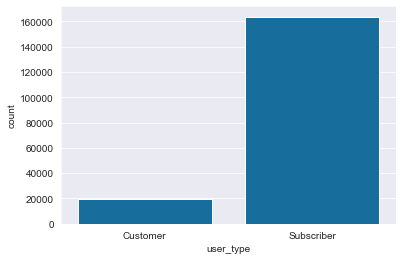

In [34]:
# Exploring user_type variable in terms of number of trips
sb.countplot(data= gobikes,x='user_type', color= base_color)

<AxesSubplot:xlabel='member_gender', ylabel='count'>

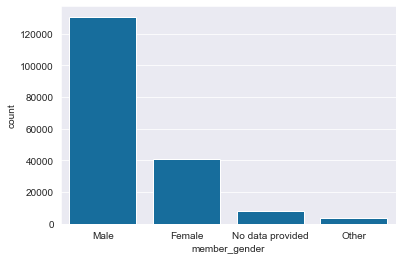

In [35]:
# Exploring member_gender variable in terms of number of trips
sb.countplot(data= gobikes,x='member_gender', color= base_color,order= gobikes['member_gender'].value_counts().index)

We notice that **Most users are Subscribers and Dominant gender is Male**

> Trip Duration

In [36]:
print ('The maximum duration of bike trip has extremely high value:' , gobikes.duration_min.max(), 'minutes.')

The maximum duration of bike trip has extremely high value: 1424.0666666666666 minutes.


Looking into the distribution of of bike trips, it's clearly skewed to right. The histograms tells that the bulk of the rides do not take longer than 30-60 minutes.

Text(0.5, 1.0, 'Distribution of bike trip duration')

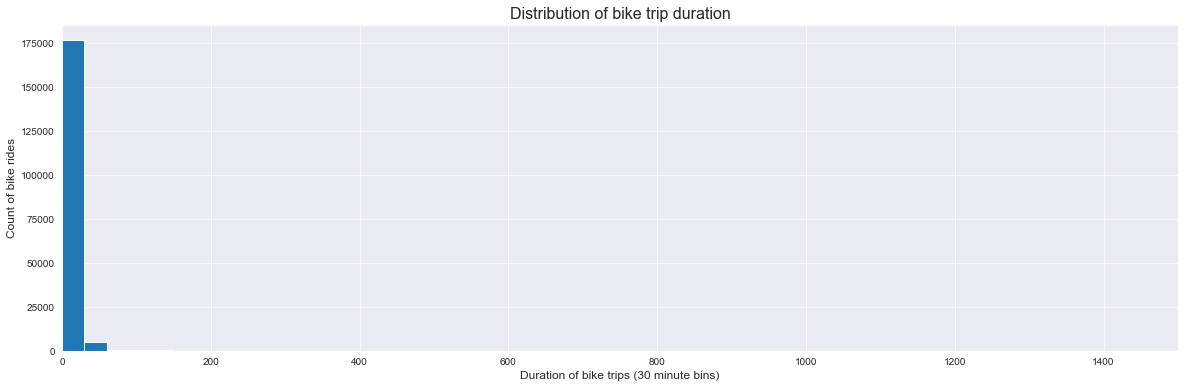

In [37]:
# Exploring trip duration variable in terms of number of trips
bins = np.arange(0, gobikes.duration_min.max(0)+1, 30)
plt.figure(figsize=(20,6))
plt.hist(data=gobikes, x='duration_min', bins=bins)
plt.xlim((0,1500))
plt.ylabel('Count of bike rides', fontsize=12)
plt.xlabel('Duration of bike trips (30 minute bins)', fontsize=12);
plt.title('Distribution of bike trip duration', fontsize=16)

In [38]:
# Duration_sec Median
print('The median of the distribution is', gobikes.duration_sec.median(), 'seconds')

The median of the distribution is 514.0 seconds


In [39]:
# Modes is 272 seconds
gobikes.duration_sec.mode()

0    272
dtype: int64

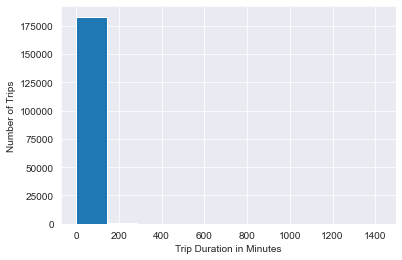

In [40]:
# Exploring trip duration variable in terms of number of trips
plt.hist(data = gobikes, x = 'duration_min')
plt.xlabel('Trip Duration in Minutes')
plt.ylabel('Number of Trips')
plt.show()

We'll need to draw more to acquire helpful insights, therefore we'll keep our graph to 60 minutes. 

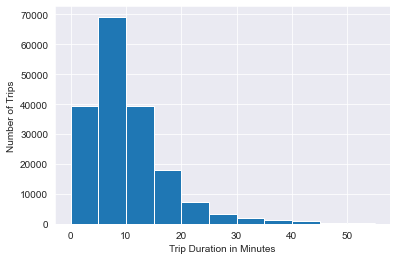

In [41]:
# Exploring trip duration variable in terms of number of trips
bins = np.arange(0, 60, 5)
plt.hist(data = gobikes, x = 'duration_min', bins = bins)
plt.xlabel('Trip Duration in Minutes')
plt.ylabel('Number of Trips')
plt.show()

We will identify that most of trips are taking less than 15 mins** and the top number of the trips takes about 10 mins.

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

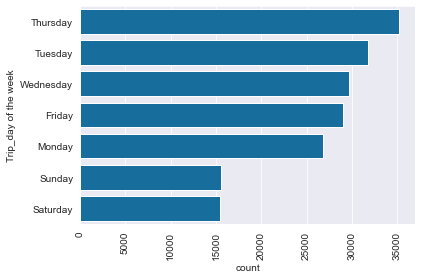

In [42]:
sb.countplot(data= gobikes,y='Trip_day of the week',color= base_color,order= gobikes['Trip_day of the week'].value_counts().index)
plt.xticks(rotation=90)

We identify surprisingly that the lowest number of trips are in the weekend holiday (Saturday and Sunday) while the top number of the trips is on Thursday the last working day of the week

<AxesSubplot:xlabel='Trip_hour of the day', ylabel='count'>

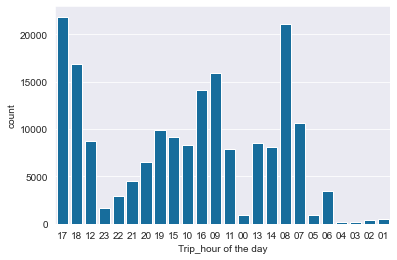

In [43]:
sb.countplot(data= gobikes,x='Trip_hour of the day', color= base_color)

We identify that the rush hours of number of trips are 8 (8 am)and 17 (5 pm) which is expected as it is the start and end working hour of most jobs while the number of the trips is the least and decreasing rapidly after midnight until dawn

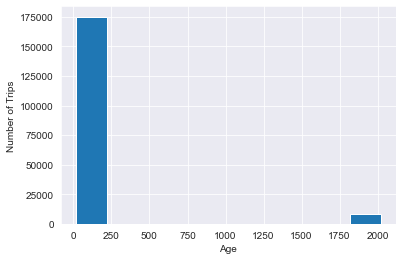

In [44]:
plt.hist(data = gobikes, x = 'user_age'); 
plt.xlabel('Age')
plt.ylabel('Number of Trips')
plt.show()

We find that there is a significant outlier due to the birth year missing data being replaced with zero, resulting in the user's age being 2019; hence, we must exclude that outlier from the graph in order to get insights. 

In [45]:
quartiles = np.percentile(gobikes['duration_min'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
sig

5.809

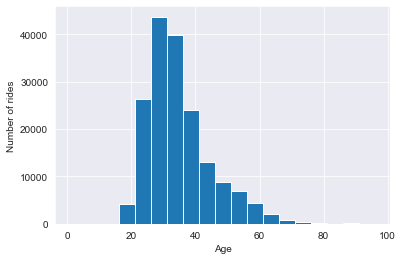

In [46]:
bins = np.arange(1, 100, 5)
plt.hist(data = gobikes, x = 'user_age', bins = bins); 
plt.xlabel('Age')
plt.ylabel('Number of rides')
plt.show()

We find another little outlier beyond 80, so we'll focus on the age range of 15 to 80. 

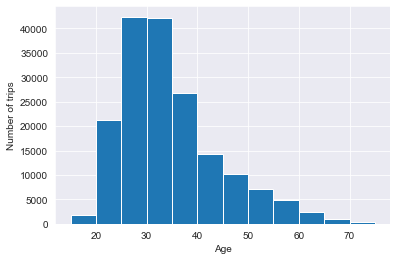

In [47]:
bins = np.arange(15, 80, 5)
plt.hist(data = gobikes, x = 'user_age', bins = bins); 
plt.xlabel('Age')
plt.ylabel('Number of trips')
plt.show()

We identify that User with Age between 25 and 35 are making top of number of trips

Let's begin by removing the outliers for safety's sake, using a rigorous sigma-clipping operation: 

With this we can use the **``query()``** method to filter-out rows with a bike ride duration outside these values:

In [48]:
gobikes_new = gobikes.query('(duration_min > @mu - 5 * @sig) & (duration_min < @mu + 5 * @sig)')

In [49]:
gobikes_new.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_min,user_age
count,179309.000000,179309.000000,179309.000000,179309.000000,179309.000000,179309.000000,179309.000000,179309.000000,179309.000000
mean,595.528016,37.771140,-122.352428,37.771338,-122.351966,4473.961296,1899.346547,9.925467,119.653453
std,377.553895,0.099746,0.117205,0.099648,0.116750,1663.399874,403.049437,6.292565,403.049437
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,11.000000,0.000000,1.016667,18.000000
25%,321.000000,37.770083,-122.411901,37.770407,-122.411647,3783.000000,1979.000000,5.350000,27.000000
50%,505.000000,37.780760,-122.398285,37.780955,-122.397437,4958.000000,1987.000000,8.416667,32.000000
75%,770.000000,37.797280,-122.285171,37.797280,-122.288045,5502.000000,1992.000000,12.833333,40.000000
max,2256.000000,37.880222,-121.874119,37.880222,-121.874119,6645.000000,2001.000000,37.600000,2019.000000


In [50]:
gobikes_new.duration_min.max()

37.6

In [51]:
gobikes.shape[0], gobikes_new.shape[0], gobikes.shape[0] - gobikes_new.shape[0]

(183412, 179309, 4103)

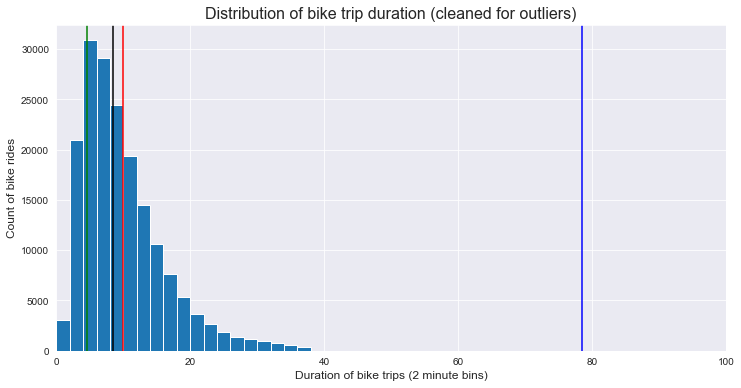

In [52]:
graph = gobikes_new.duration_min
bins = np.arange(0, gobikes_new.duration_min.max(0)+1, 2)
plt.figure(figsize=(12,6))
plt.hist(data=gobikes_new, x='duration_min', bins=bins)
plt.xlim((0,100))

plt.ylabel('Count of bike rides', fontsize=12)
plt.xlabel('Duration of bike trips (2 minute bins)', fontsize=12);
plt.title('Distribution of bike trip duration (cleaned for outliers)', fontsize=16);

import statistics
plt.axvline(statistics.mean(graph),color='red');
plt.axvline(statistics.mode(graph),color='green');
plt.axvline(statistics.median(graph),color='black');
plt.axvline(78.5, color='blue');

The number of trips to favourite end station names is distributed. 

In [53]:
# let us limit to the top 10 destinations:
top_dest = gobikes_new['end_station_name'].value_counts().index[:10]

In [54]:
# here we create dataframe with trips only to top 10 destinations
top_dest_df = gobikes_new.loc[gobikes_new['end_station_name'].isin(top_dest)]
top_dest_df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,user_age,start_date,Trip_day of the week,Trip_hour of the day
134130,428,2019-02-08 17:51:46.129,2019-02-08 17:58:55.097,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,58.0,Market St at 10th St,37.776619,...,4357,Subscriber,1986,Male,No,7.133333,33,02/08/19,Friday,17
55401,914,2019-02-21 10:06:20.944,2019-02-21 10:21:35.466,84.0,Duboce Park,37.769201,-122.433812,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,2353,Subscriber,1994,Other,No,15.233333,25,02/21/19,Thursday,10
28387,982,2019-02-25 08:35:12.160,2019-02-25 08:51:34.680,129.0,Harrison St at 20th St,37.758862,-122.412544,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,...,4981,Subscriber,1982,Male,No,16.366667,37,02/25/19,Monday,08
100575,607,2019-02-14 18:12:08.160,2019-02-14 18:22:15.915,16.0,Steuart St at Market St,37.794130,-122.394430,81.0,Berry St at 4th St,37.775880,...,6585,Subscriber,1994,Male,No,10.116667,25,02/14/19,Thursday,18
15007,632,2019-02-27 10:16:19.565,2019-02-27 10:26:51.887,126.0,Esprit Park,37.761634,-122.390648,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,...,5790,Subscriber,1971,Female,No,10.533333,48,02/27/19,Wednesday,10


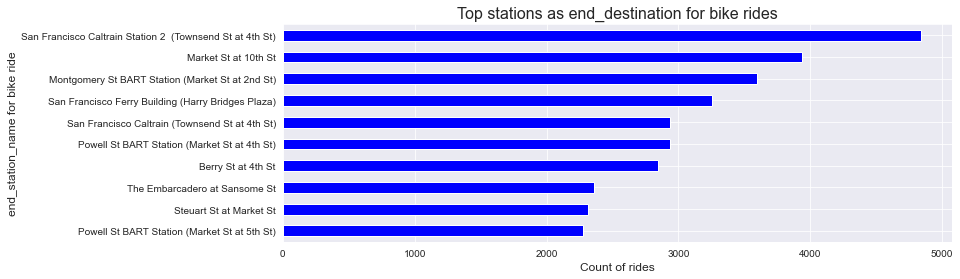

In [55]:
plt.figure(figsize=(12,4))
sb.set_style('darkgrid')
top_dest_df['end_station_name'].value_counts().sort_values(ascending=True).plot(kind='barh', color='blue');
plt.title('Top stations as end_destination for bike rides', fontsize=16)
plt.xlabel('Count of rides', fontsize=12)
plt.ylabel('end_station_name for bike ride', fontsize=12);

Let's take a look at the 'Outlier Group' profile (>44 minutes) to see if there are any patterns or peculiarities. 

Previous section, we classified bike trips lasting more than 44 minutes as outliers, and we eliminated any observations lasting more than 44 minutes. The dataframe gobikes new was created as a result of this. 

Let's look at the sample of bike rides using a Z-score between 5 and 10 standard deviations to see how the profile of this 'OUTLIER' group changes over time.
The dataframe gobikes outliergroup is created as a result of this. 

In [56]:
gobikes_outliergroup = gobikes.query('(duration_min > @mu - 10 * @sig) & (duration_min < @mu + 10 * @sig)')

In [57]:
# Let's have a look at the outliers in duration_min
outliers = gobikes_outliergroup.query('duration_min >= 44')
outliers.shape

(1396, 21)

In [58]:
outliers.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_min,user_age
count,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000
mean,3163.437679,37.770403,-122.349739,37.771226,-122.351627,4526.121060,1767.977077,52.723961,251.022923
std,374.045396,0.106782,0.126131,0.106841,0.126839,1615.684621,618.328020,6.234090,618.328020
min,2640.000000,37.317298,-122.453704,37.322125,-122.453704,27.000000,0.000000,44.000000,18.000000
25%,2827.750000,37.771917,-122.417385,37.771917,-122.418954,4228.750000,1969.000000,47.129167,26.000000
50%,3115.500000,37.786375,-122.400869,37.786375,-122.403234,4969.000000,1986.000000,51.925000,33.000000
75%,3452.500000,37.802746,-122.279081,37.802746,-122.283093,5515.250000,1993.000000,57.541667,50.000000
max,3999.000000,37.880222,-121.874119,37.880222,-121.874119,6644.000000,2001.000000,66.650000,2019.000000


- This OUTLIER GROUP has 1178 excursions with a maximum bike ride duration of 78.5 minutes (=44 + 5 times standard) and a minimum of 44 minutes, according to the describe table. 

Let us now take a closer look at this group's profile:

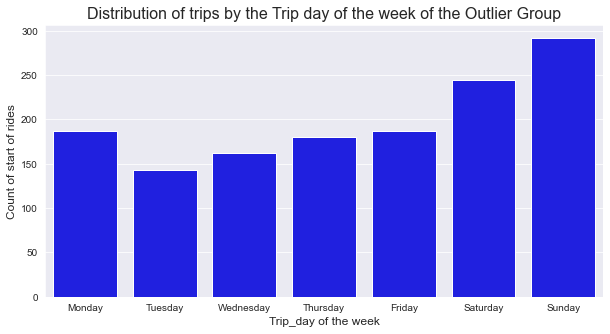

In [59]:
plt.figure(figsize=(10,5))
base_color = sb.color_palette()[3]

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
outliers['Trip_day of the week'] = outliers['Trip_day of the week'].astype(weekdaycat)

sb.countplot(data=outliers, x='Trip_day of the week',color = 'blue')
plt.xlabel('Trip_day of the week', fontsize=12)
plt.ylabel('Count of start of rides', fontsize=12)
plt.title("Distribution of trips by the Trip day of the week of the Outlier Group", fontsize=16);

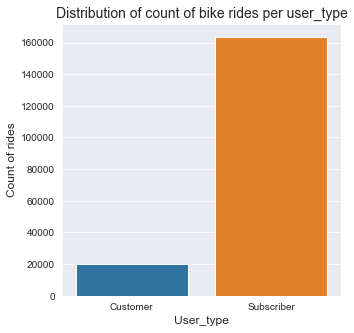

In [60]:
# Same distribution in countplot format
plt.figure(figsize=(5,5))

sb.countplot(data=gobikes, x='user_type')
plt.xlabel('User_type', fontsize=12)
plt.ylabel('Count of rides', fontsize=12)
plt.title('Distribution of count of bike rides per user_type', fontsize=14);

Distribution of user_type:

In [61]:
gobikes.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

Almost 80% of users are subscribers:

In [62]:
gobikes.user_type.value_counts() / gobikes.shape[0]

Subscriber    0.891676
Customer      0.108324
Name: user_type, dtype: float64

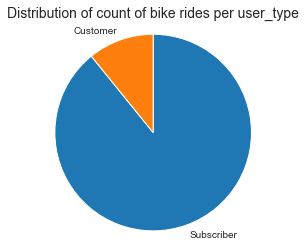

In [63]:
# distribution via pie chart
sorted_counts = gobikes['user_type'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');
plt.title('Distribution of count of bike rides per user_type', fontsize=14);

In [64]:
# Groupby the data by gobikes type
data = gobikes.groupby("member_gender")["duration_min"].sum()
data

member_gender
Female              5.303392e+05
Male                1.464683e+06
No data provided    1.638484e+05
Other               6.065457e+04
Name: duration_min, dtype: float64

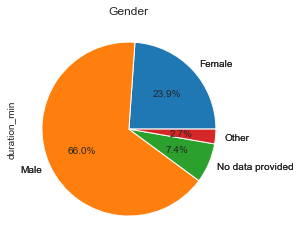

In [65]:
data.plot.pie(autopct="%.1f%%");
data.plot.pie(title='Gender');

In [66]:
# Groupby the data by gobikes type
data = gobikes.groupby("user_type")["duration_min"].sum()
data

user_type
Customer      4.743369e+05
Subscriber    1.745188e+06
Name: duration_min, dtype: float64

<AxesSubplot:title={'center':'Percentage of Duration of Minutes by User Type '}, ylabel='duration_min'>

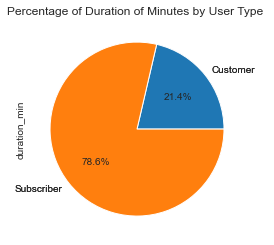

In [67]:
data.plot.pie(autopct="%.1f%%");
data.plot.pie(title='Percentage of Duration of Minutes by User Type ')

In [68]:
# Calculating % split for the user type
customer = gobikes.query('user_type == "Customer"')['bike_id'].count()
subscriber = gobikes.query('user_type == "Subscriber"')['bike_id'].count()

customer_prop = customer / gobikes['bike_id'].count()
subscriber_prop = subscriber / gobikes['bike_id'].count()

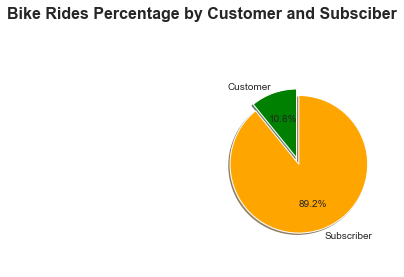

In [69]:
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_prop, subscriber_prop]
colors = ['green', 'orange']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('Bike Rides Percentage by Customer and Subsciber', y=1.04, fontsize=16, fontweight='semibold');

Customers use bike service 11.7 percent of the time, whereas subscribers use it 88 percent of the time.
This indicates that subscribers utilise it for their everyday commutes, while customers use it for more leisure activities. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Regarding users :
 - Most users are Subscribers and Dominant gender is Male 
 - User with Age between 25 and 35 are making top of number of trips 
 
> Regarding trips :
  - most of trips are taking less than 15 mins** and the top number of the trips takes about 10 mins.**
  - surprisingly, the lowest number of trips are in the weekend holiday (Saturday and Sunday) while the top number of the trips is on Thursday the last working day of the week.
  - the rush hours of number of trips are 8 (8 am)and 17 (5 pm) which is expected as it is the start and end working hour of most jobs while the number of the trips is the least and decreasing rapidly after midnight until dawn
  
> Consequently, no further transformation was required after the cleaning process

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> Trip Duration: 
 - there was an outlier so, we needed to make a zoomin and limit the number of minutes to 60 to get better insights  
 
> User age: 
 - We find that there is a significant outlier due to the birth year missing data being replaced with zero, resulting in the user's age being 2019; hence, we must exclude that outlier from the graph in order to get insights.
 - We cleaned it up even further by narrowing the age range to 15 to 80 years old in order to eliminate another minor outlier and gain better insights. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In this section I will further explore the dataset by adding the customer type to the analysis.

In [70]:
# calculating % split for the user type
customer = gobikes.query('user_type == "Customer"')['bike_id'].count()
subscriber = gobikes.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / gobikes['bike_id'].count()
subscriber_proportion = subscriber / gobikes['bike_id'].count()

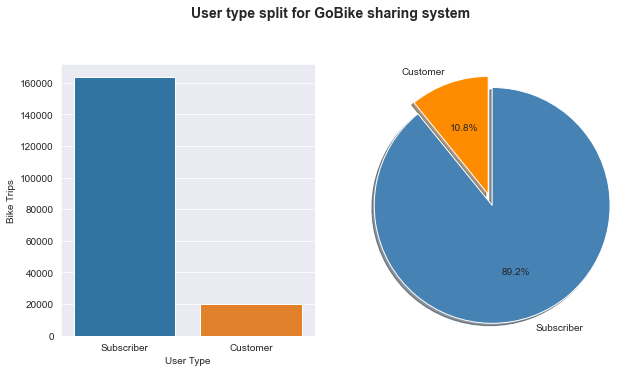

In [71]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sb.countplot(data=gobikes, x="user_type", order=gobikes.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('Bike Trips')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', y=1.04, fontsize=14, fontweight='semibold');

Let us first compare the histogram distribution of each user_type:

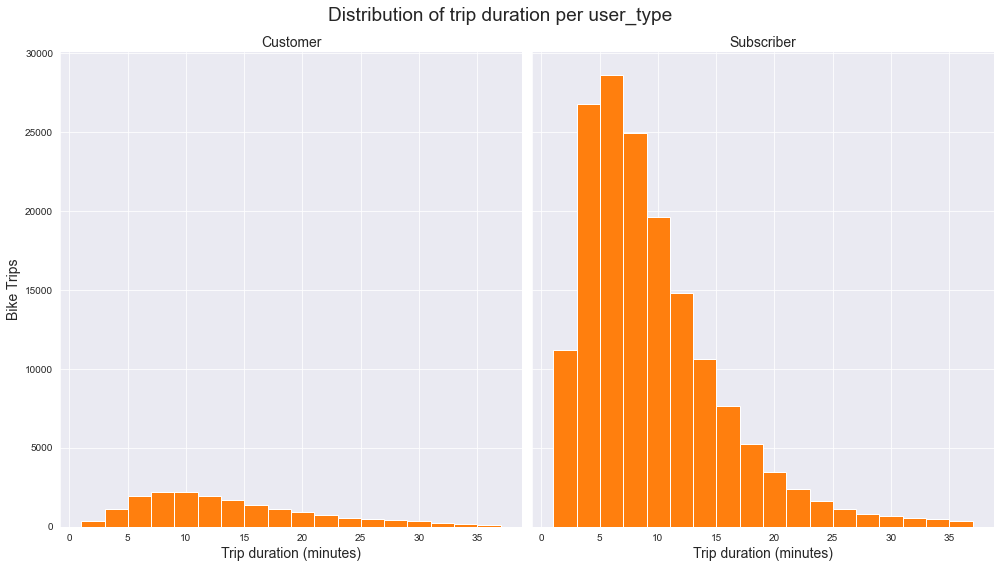

In [72]:
# code for the (histogram) duration (min) distribution per user type
# plotting
def titlesFaceGrid(g,title):
    '''
     Adding a title to this Seaborne plot
    '''

g = sb.FacetGrid(data = gobikes, col = 'user_type', col_wrap = 2, height = 6)
base_color = sb.color_palette()[1]

## Set Plot Dimension - Figure Level
g.fig.set_size_inches(14, 8);

g.map(plt.hist, 'duration_min', bins = np.arange(gobikes_new['duration_min'].min(), gobikes_new['duration_min'].max()+1, 2), color = base_color)
g.set_ylabels('Bike Trips', size=14)
g.set_xlabels('Trip duration (minutes)', size=14)
## set facet plot title
g.set_titles(col_template = '{col_name}', size=14)
plt.subplots_adjust(top=0.8)
## set title
g.fig.suptitle('Distribution of trip duration per user_type', fontsize=19);
## optimize distance between plots
plt.tight_layout()


- The two distributions above tell that Subscribers typically have shorter bike trips (with quite high mode in the bin 6-8 minutes)

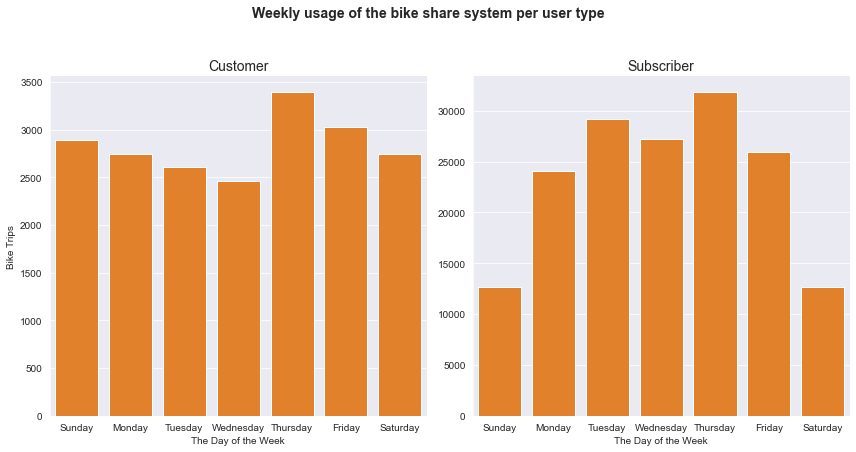

In [73]:
def titlesFaceGrid(g,title):
    '''
     Adding a title to this Seaborne plot
    '''
## Set Plot Dimension - Figure Level
g.fig.set_size_inches(14, 8);

weekday_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
# weekly usege of the bike sharing system per user type
g = sb.catplot(data=gobikes, x='Trip_day of the week', col="user_type", order = weekday_order, kind='count',  sharey = False,
            height = 6, color = base_color)
g.set_axis_labels("The Day of the Week", "Bike Trips")
## set facet plot title
g.set_titles("{col_name}", size=14);
## set title
g.fig.suptitle('Weekly usage of the bike share system per user type', y=1.04, fontsize=14, fontweight='semibold');
## optimize distance between plots
plt.tight_layout()



We've seen that Subscribers take the fewest journeys over the weekend (Saturday and Sunday), but Customers take the fewest excursions on Wednesday and have significantly more trips during the weekend (Saturday and Sunday). 

There is a different trend on which days customers and subscribers rent bikes. As mentioned above customers are most probably occasional riders and tourist who use the bike sharing system on holiday or weekend trips. On the other hand, subscribers are most probably daily work/school commuters who use the system within a week. 

Next, I am going to check when within a day bikes are high in demand.

In [74]:
# extract start time weekdays
gobikes['start_time_weekday']=gobikes['start_time'].dt.strftime('%a')

# extract start time day
gobikes['start_time_day']=gobikes['start_time'].dt.day.astype(int)

# extract start time hour
gobikes['start_time_hour']=gobikes['start_time'].dt.hour

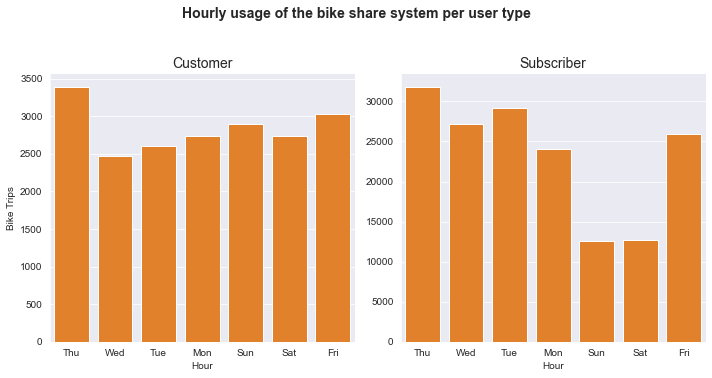

In [75]:
def titlesFaceGrid(g,title):
    '''
     Adding a title to this Seaborne plot
    '''
## Set Plot Dimension - Figure Level
g.fig.set_size_inches(14, 8);

# hourly usege of the bike sharing system per user type
g = sb.catplot(data=gobikes, x='start_time_weekday', col="user_type", kind='count', sharey = False,
            color = base_color)
g.set_axis_labels("Hour", "Bike Trips")
## set facet plot title
g.set_titles("{col_name}", size=14);
## set title
g.fig.suptitle('Hourly usage of the bike share system per user type', y=1.04, fontsize=14, fontweight='semibold');
## optimize distance between plots
plt.tight_layout()

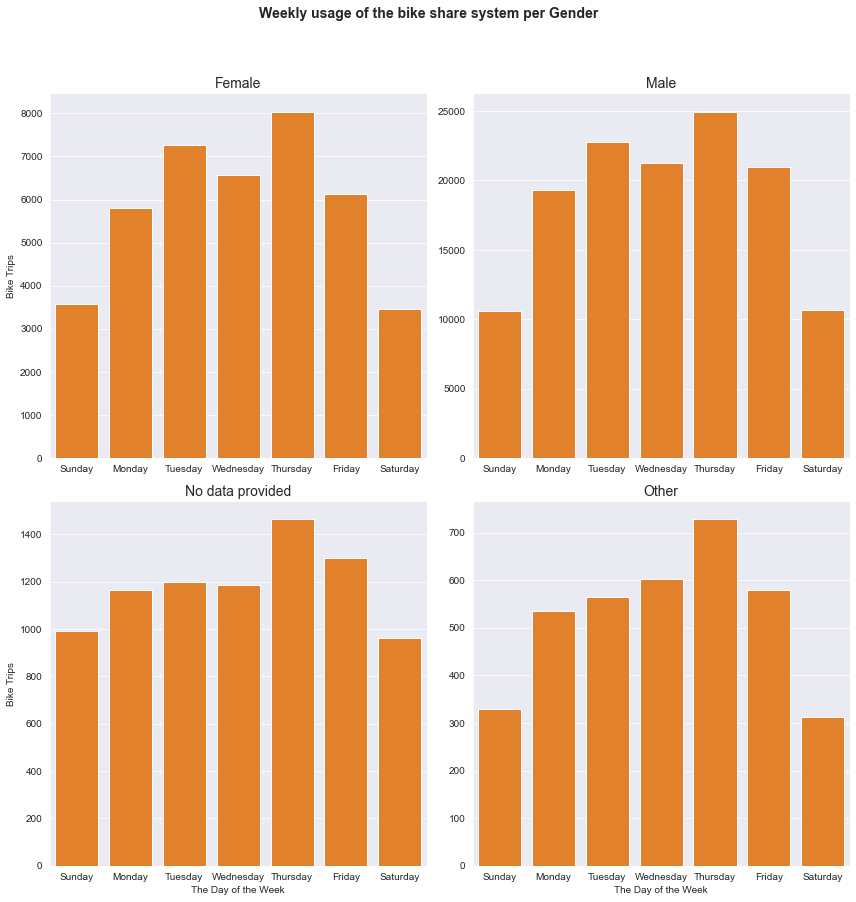

In [76]:
def titlesFaceGrid(g,title):
    '''
     Adding a title to this Seaborne plot
    '''
## Set Plot Dimension - Figure Level
g.fig.set_size_inches(14, 8);

weekday_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']


# weekly usege of the bike sharing system per user type
g = sb.catplot(data=gobikes, x='Trip_day of the week', col="member_gender", order = weekday_order, col_wrap=2, kind='count',  sharey = False,
            sharex = False, color = base_color, height = 6);
g.set_axis_labels("The Day of the Week", "Bike Trips")
## set facet plot title
g.set_titles("{col_name}", size=14);
## set title
g.fig.suptitle('Weekly usage of the bike share system per Gender', y=1.04, fontsize=14, fontweight='semibold');
## optimize distance between plots
plt.tight_layout()

We've discovered that gender differences have no effect on the number of trips made during the course of the week. 

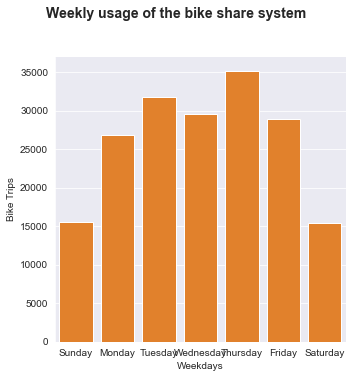

In [77]:
def titlesFaceGrid(g,title):
    '''
     Adding a title to this Seaborne plot
    '''
## Set Plot Dimension - Figure Level
g.fig.set_size_inches(14, 8);


# weekday usege of the bike sharing system
weekday_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
g = sb.catplot(data=gobikes, x='Trip_day of the week', kind='count', color = base_color, order = weekday_order)
g.set_axis_labels("Weekdays", "Bike Trips")
## set facet plot title
g.set_titles("{col_name}", size=14);
## set title
g.fig.suptitle('Weekly usage of the bike share system', y=1.04, fontsize=14, fontweight='semibold');
## optimize distance between plots
plt.tight_layout()

The bike share system is mainly used during weekdays, with Tuesday - Thursday as the most popular days for bike rides. The system is most probably used as a daily work/school commute.

In [78]:
# we will filter out the outliers in duration_min so, we can make our Bivariate plots easily
gobikes = gobikes.query('duration_min <= 60')
gobikes.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181702 entries, 4 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             181702 non-null  int64         
 1   start_time               181702 non-null  datetime64[ns]
 2   end_time                 181702 non-null  datetime64[ns]
 3   start_station_id         181702 non-null  object        
 4   start_station_name       181702 non-null  object        
 5   start_station_latitude   181702 non-null  float64       
 6   start_station_longitude  181702 non-null  float64       
 7   end_station_id           181702 non-null  object        
 8   end_station_name         181702 non-null  object        
 9   end_station_latitude     181702 non-null  float64       
 10  end_station_longitude    181702 non-null  float64       
 11  bike_id                  181702 non-null  int64         
 12  user_type       

Let's take a closer look at and compare the distribution of user types. 

We create a barplot, a violinplot and a boxplot to analyse the relationship between 'duration (sec)' of trip and 'user_type':

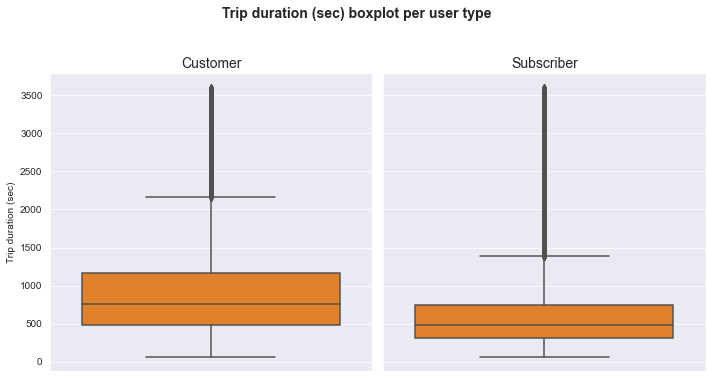

In [79]:
def titlesFaceGrid(g,title):
    '''
     Adding a title to this Seaborne plot
    '''
## Set Plot Dimension - Figure Level
g.fig.set_size_inches(14, 8);

# code for the (boxplot) duration (sec) distribution per user type
data = gobikes.query('duration_sec < 3600')
g = sb.catplot(data=data, y='duration_sec', col="user_type", kind='box',
            color = base_color)
## set facet plot title
g.set_titles("{col_name}", size=14);
g.set_axis_labels("", "Trip duration (sec)")
## set title
g.fig.suptitle('Trip duration (sec) boxplot per user type', y=1.04, fontsize=14, fontweight='semibold');
## optimize distance between plots
plt.tight_layout()

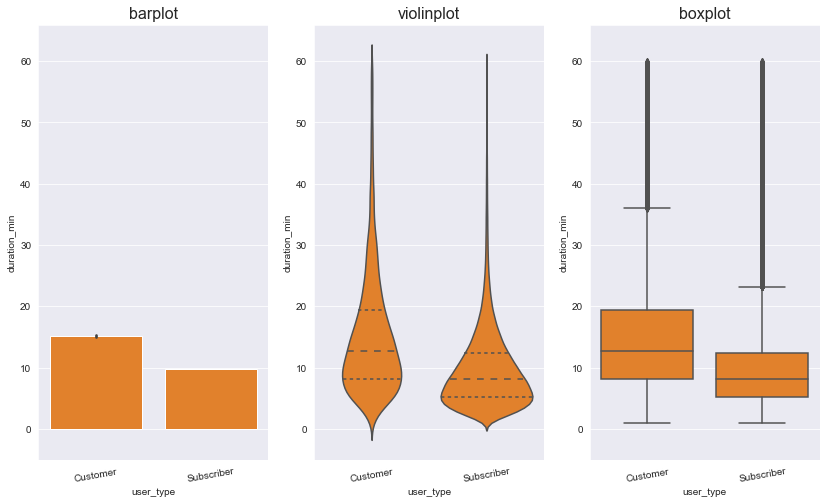

In [80]:
plt.figure(figsize = [14, 8])
base_color = sb.color_palette()[1]

# mid plot: violinplot
plt.subplot(1, 3, 2)
ax1 = sb.violinplot(data = gobikes, x = 'user_type', y = 'duration_min', inner='quartile', color = base_color)       
            # by setting inner = 'quartile' in violin plot, three lines will be plotted within each violin area for the three middle quartiles. 
            # The line with thick dashes indicates the median, and the two lines with shorter dashes on either side the first and third quartiles.
plt.xticks(rotation = 10)             # include label rotation due to small subplot size
plt.title('violinplot', fontsize=16)

# left plot: barplot
plt.subplot(1, 3, 1)
sb.barplot(data = gobikes, x = 'user_type', y = 'duration_min', color = base_color)
plt.xticks(rotation = 10)
plt.ylim(ax1.get_ylim())              # set y-axis limits to be same as left plot
plt.title('barplot', fontsize=16);

# right plot: boxplot
plt.subplot(1, 3, 3)
sb.boxplot(data = gobikes, x = 'user_type', y = 'duration_min', color = base_color)
plt.xticks(rotation = 10)
plt.ylim(ax1.get_ylim())              # set y-axis limits to be same as left plot
plt.title('boxplot', fontsize=16);

- Customers' average bike journey time is nearly double that of Subscribers, as shown in the barplot on the left (18 vs 10 minutes). 

- The centre violinplot reveals that the third quartile of Subscribers (13 minutes) is considerably lower than the Customers distribution's median (15 min). 

- Individual outlier points that are more than 1.5 times the IQR above the third quartile are indicated as points above the higher whisker for both user types, according to the boxplot on the right.
Note that we sigma-clipped observations based on +/- 5 * @sig in paragraph 5.1. The higher whisker would have been higher if we had clipped based on +/- 10 * @sig, and these outliers points would not have been outliers. 

NOTE: The violin plot's inner boxes and lines correspond to the box plot's boxes and whiskers.
The median of the distribution is shown by the central line in a box plot, while the third and first quartiles of the data are represented by the top and bottom of the box, respectively.
As a result, the box's height represents the interquartile range (IQR).
From the box's top and bottom (of boxplot),As a result, the box's height represents the interquartile range (IQR).
The whiskers indicate the range from the first or third quartiles to the minimum or maximum value in the distribution from the top and bottom of the box (of boxplot).
Typically, a maximum range is defined for whisker length, which is 1.5 times the IQR by default. 



Text(0, 0.5, 'Trip Duration in Mins')

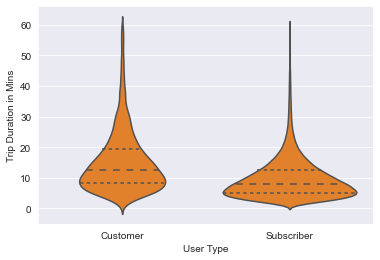

In [81]:
sb.violinplot(data=gobikes, x='user_type', y='duration_min', color=base_color, inner='quartile',scale="area")
plt.xlabel('User Type')
plt.ylabel('Trip Duration in Mins')

We've seen that
- Subscribers have narrower trip duration than Customers
- Subscibers have more specific Trips than casual Customers

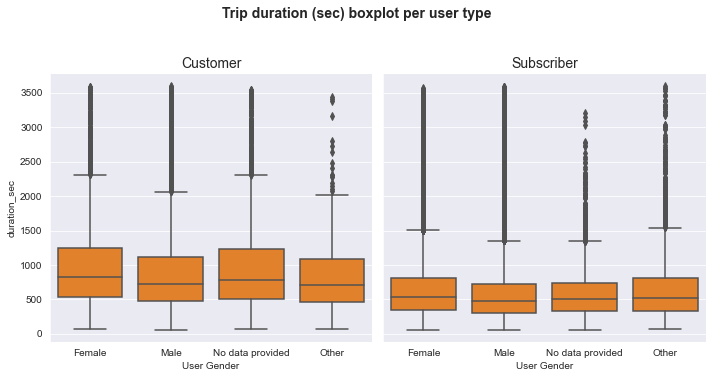

In [82]:
def titlesFaceGrid(g,title):
    '''
     Adding a title to this Seaborne plot
    '''
## Set Plot Dimension - Figure Level
g.fig.set_size_inches(14, 8);

# code for the (boxplot) duration (sec) distribution per user type
data = gobikes.query('duration_sec < 3600')
g = sb.catplot(data=data, x='member_gender', y='duration_sec', col="user_type", kind='box',
            color = base_color)
## set facet plot title
g.set_titles("{col_name}", size=14);
g.set_axis_labels('User Gender')
## set title
g.fig.suptitle('Trip duration (sec) boxplot per user type', y=1.04, fontsize=14, fontweight='semibold');
## optimize distance between plots
plt.tight_layout()

Looking at both charts (histograms and box plots), we can see that trip durations are longer for customers (9 to 23 minutes) than for subscribers (7 to 13 minutes). This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

Text(0, 0.5, 'Trip Duration in Mins')

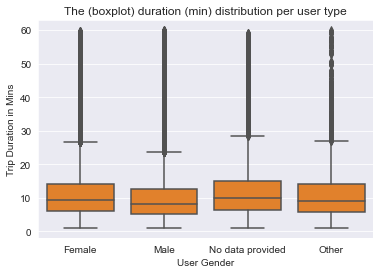

In [83]:
# code for the (boxplot) duration (min) distribution per user type
sb.boxplot(data=gobikes, x='member_gender', y="duration_min", color = base_color)
plt.xlabel('User Gender')
plt.title('The (boxplot) duration (min) distribution per user type')
plt.ylabel('Trip Duration in Mins')

We've seen that Males tends to have a slightly shorter trips’ duration than females.

Text(0, 0.5, 'Duration or Trips in Mins')

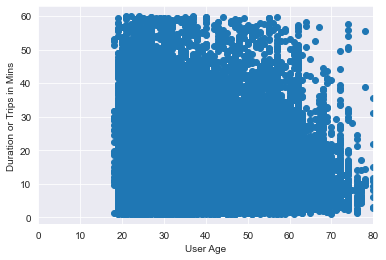

In [84]:
plt.scatter(data = gobikes, x = 'user_age', y = 'duration_min');
plt.xlim(0, 80); # to limit user age to 80 years and we have already filtered duration in mins to 60 min
plt.xlabel('User Age')
plt.ylabel('Duration or Trips in Mins')


We've seen that trip duration decreases as age increases.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  
   - Subscribers prefer to hire bikes throughout the weekdays, whereas customers prefer to rent bikes for longer periods of time during the weekend holiday (Saturday and Sunday). 
   - Subscribers rent bikes for a shorter period of time, whereas Customers hire bikes for a longer period of time. 
   - The number of trips made during the course of the week is unaffected by gender differences. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>  
  - Trip duration decreases as age increases.
  - Males tends to have a slightly shorter trips’ duration than females.

## Multivariate Exploration

> Create plots of three or more variables to investigate our data even
further.

In this section I will further explore the dataset by adding gender to the customer type and check the hourly distribution of bike rides during weekdays for customers and subscribers.

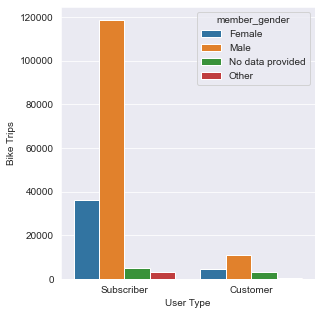

In [85]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sb.countplot(data=gobikes, x="user_type", hue="member_gender", order=gobikes.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('Bike Trips');

In general, males are using the system more often than females and others (the registration system allows you to choose 'Other' as a gender). 

The trend shows us that the male is more often user than female through the week as Customer and Subscriber too.

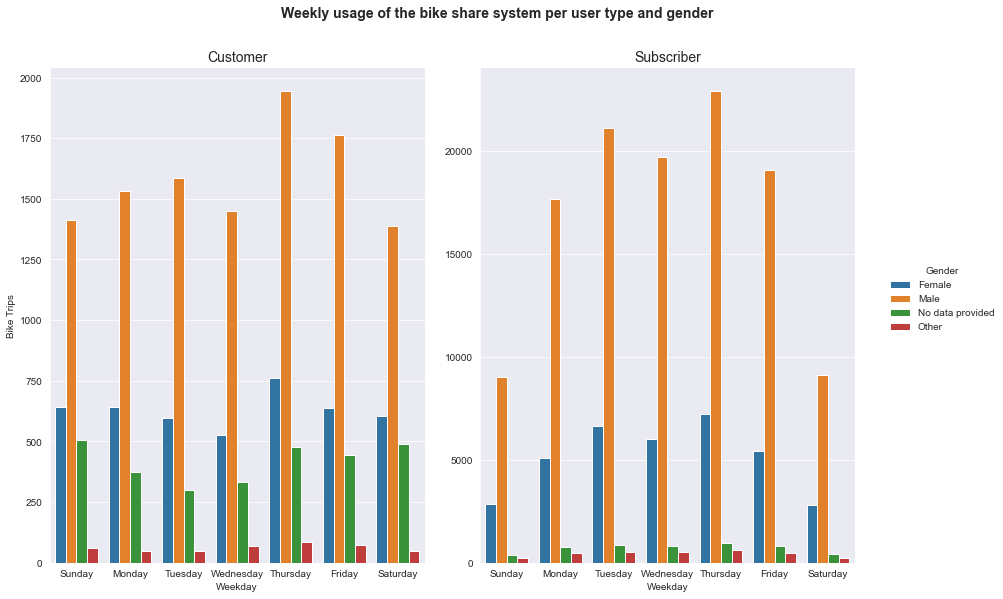

In [86]:
def titlesFaceGrid(g,title):
    '''
     Adding a title to this Seaborne plot
    '''


# weekday usege of the bike sharing system per user type and gender
weekday_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
g = sb.catplot(data=gobikes, x='Trip_day of the week', col="user_type", hue='member_gender', kind='count', sharey = False,
                order = weekday_order)
## Set Plot Dimension - Figure Level
g.fig.set_size_inches(14, 8);

g.set_axis_labels("Weekday", "Bike Trips")
g._legend.set_title('Gender')
## set facet plot title
g.set_titles("{col_name}", size=14);
## set title
g.fig.suptitle('Weekly usage of the bike share system per user type and gender', y=1.04, fontsize=14, fontweight='semibold');

The trend shows us that female customer is more often user specifically on Thrusdays(weekdays) than female subscriber.

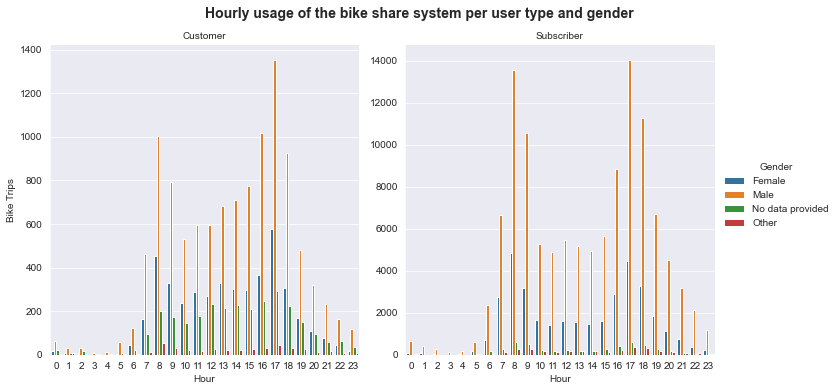

In [87]:
# hourly usege of the bike sharing system per user type and gender
g = sb.catplot(data=gobikes, x='start_time_hour', col="user_type", hue="member_gender", kind='count', sharey = False)
g.set_axis_labels("Hour", "Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type and gender', y=1.04, fontsize=14, fontweight='semibold');



Here we can observe that in both cases, females take longer trips (measured in time) than males and other. The difference is more visible for customers (~13 min for males and other vs ~15 for females) than for subscribers (the difference is quite small).

During the day, both males and females use the system the same way: customers use bikes mainly between 8 am - 7 pm; subscribers on the other side use the system at around 8-9am and 5-6pm when they go and come back from work.

We look at the trip duration profile the days of the week: 

- Customers' trip duration is significantly higher on weekends, as shown in the clustered barchart above.  
- On weekends, the duration is typically 18.5 minutes, which is nearly 10% higher than the top score on a weekday:

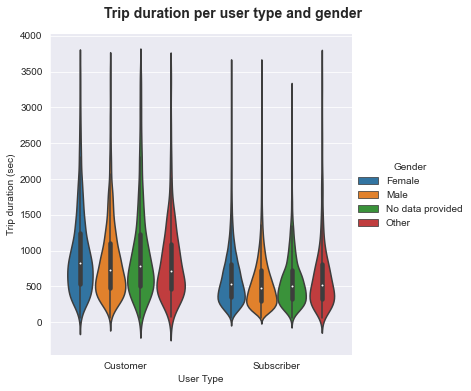

In [88]:
# code for the (violinplot) duration (sec) distribution per user type and gender
g = sb.catplot(data=gobikes, x="user_type", y="duration_sec", hue="member_gender", kind="violin")

g.set_axis_labels("User Type", "Trip duration (sec)")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Trip duration per user type and gender', y=1.04, fontsize=14, fontweight='semibold');

In [89]:
(18.57- 16.84) / 16.84

0.10273159144893114

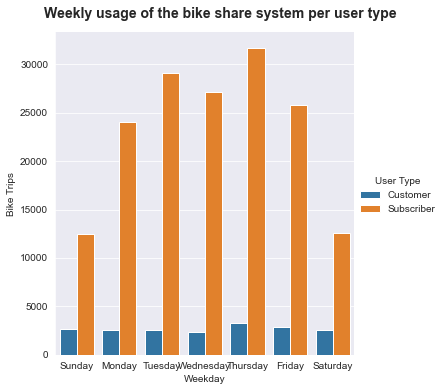

In [90]:
# weekday usege of the bike sharing system per user type 
weekday_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
g = sb.catplot(data=gobikes, x='Trip_day of the week',  hue='user_type', kind='count', sharey = False,
                order = weekday_order)
g.set_axis_labels("Weekday", "Bike Trips")
g._legend.set_title('User Type')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type', y=1.04, fontsize=14, fontweight='semibold');


In [91]:
gobikes.groupby(['Trip_day of the week', 'user_type']) ['duration_min'].mean()

Trip_day of the week  user_type 
Friday                Customer      14.568715
                      Subscriber     9.791585
Monday                Customer      15.313403
                      Subscriber     9.606655
Saturday              Customer      17.534268
                      Subscriber    10.501088
Sunday                Customer      18.212765
                      Subscriber    10.480676
Thursday              Customer      13.930204
                      Subscriber     9.857309
Tuesday               Customer      13.612725
                      Subscriber     9.643826
Wednesday             Customer      13.670839
                      Subscriber     9.653977
Name: duration_min, dtype: float64

We look at the trip duration profile over the hours-of-the-day:

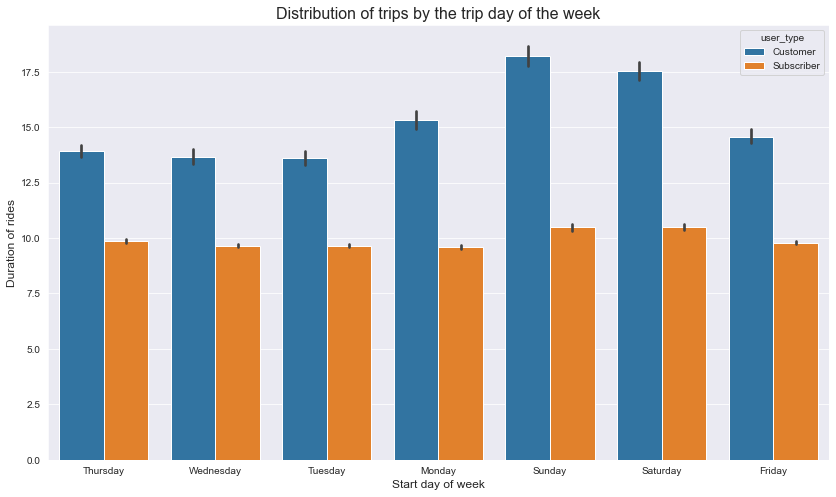

In [92]:
plt.figure(figsize=(14, 8))
base_color = sb.color_palette()[1]


sb.barplot(data=gobikes, x='Trip_day of the week', y='duration_min', hue='user_type')
plt.xlabel('Start day of week', fontsize=12)
plt.ylabel('Duration of rides', fontsize=12)
plt.title("Distribution of trips by the trip day of the week", fontsize=16);

- For both user types, the trip duration has a decline between 6 and 9 o'clock, and it is then rather steady. 

We look at how Customers and Subscribers' hourly consumption changes throughout the course of a week:

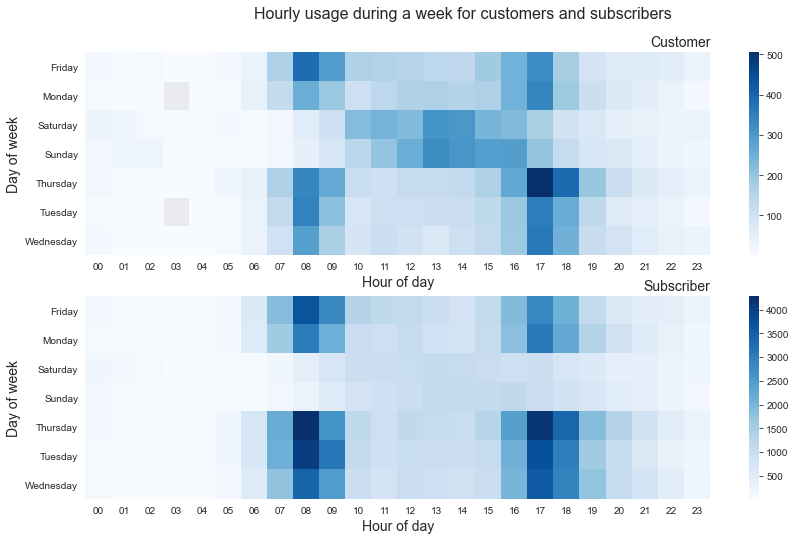

In [93]:
plt.figure(figsize=(14,8))

plt.subplot(2, 1, 1)
customers = gobikes.query('user_type == "Customer"')
ct_counts = customers.groupby(['Trip_day of the week', 'Trip_hour of the day']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='Trip_day of the week', columns='Trip_hour of the day', values='count')
sb.heatmap(ct_counts, cmap="Blues");
plt.title('Customer', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplot(2, 1, 2)
subscribers = gobikes.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['Trip_day of the week', 'Trip_hour of the day']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='Trip_day of the week', columns='Trip_hour of the day', values='count')
sb.heatmap(st_counts, cmap="Blues");
plt.title('Subscriber', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplots_adjust(top=0.9)
plt.suptitle('Hourly usage during a week for customers and subscribers', fontsize=16);


- Customers primarily utilise the bike service on Saturdays and Sundays from 12 p.m. to 5 p.m., whilst Subscribers are more likely to take a trip during peak hours from Monday to Friday (8-9 AM, 17-18 PM). 

The following table shows the distribution of trip duration by start_day_of_week and top destination end_station_name:

In [94]:
# let us limit to the top 10 destinations:
top_dest = gobikes_new['end_station_name'].value_counts().index[:10]

In [95]:
top_dest_df = gobikes_new.loc[gobikes_new['end_station_name'].isin(top_dest)]
top_dest_df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,user_age,start_date,Trip_day of the week,Trip_hour of the day
131413,584,2019-02-09 12:52:11.328,2019-02-09 13:01:55.766,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,...,1183,Subscriber,1990,Female,No,9.733333,29,02/09/19,Saturday,12
121215,534,2019-02-11 15:51:27.652,2019-02-11 16:00:22.493,66.0,3rd St at Townsend St,37.778742,-122.392741,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,4973,Subscriber,1984,Male,No,8.900000,35,02/11/19,Monday,15
152906,261,2019-02-06 14:19:36.021,2019-02-06 14:23:57.224,10.0,Washington St at Kearny St,37.795393,-122.404770,16.0,Steuart St at Market St,37.794130,...,4767,Subscriber,1995,Male,No,4.350000,24,02/06/19,Wednesday,14
153640,830,2019-02-06 11:59:28.945,2019-02-06 12:13:19.541,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,58.0,Market St at 10th St,37.776619,...,5105,Customer,1971,Male,No,13.833333,48,02/06/19,Wednesday,11
137140,498,2019-02-08 08:57:21.424,2019-02-08 09:05:40.396,16.0,Steuart St at Market St,37.794130,-122.394430,6.0,The Embarcadero at Sansome St,37.804770,...,2293,Subscriber,1967,Male,No,8.300000,52,02/08/19,Friday,08


In [96]:
gobikes['Trip_day of the week'] = gobikes.start_time.dt.strftime('%A')

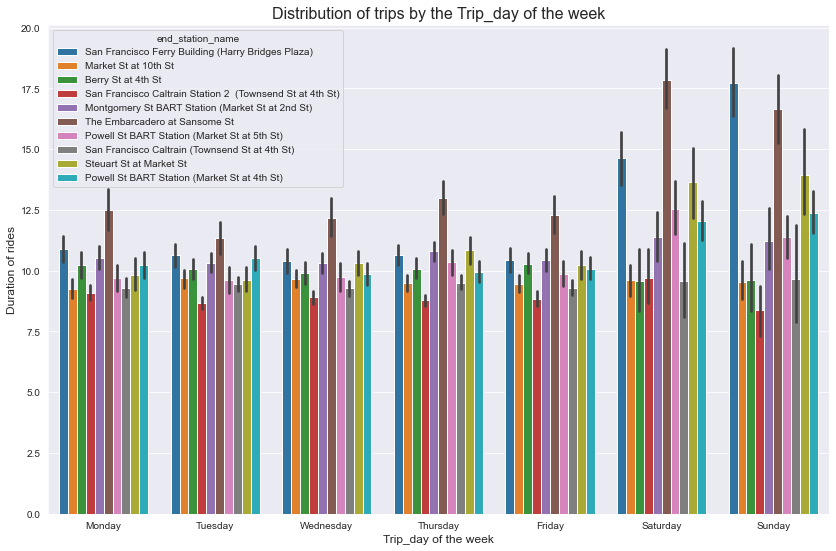

In [97]:
plt.figure(figsize=(14,9))
base_color = sb.color_palette()[1]


weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
top_dest_df['Trip_day of the week'] = top_dest_df['Trip_day of the week'].astype(weekdaycat)

# create a palette - assign a color to each endstation
palette = dict(zip(top_dest_df.end_station_name.unique(),
                   sb.color_palette(n_colors=len(top_dest_df.end_station_name.unique()))))
# update the color for Embarcadero
palette.update({'The Embarcadero at Sansome St':"w"})

sb.barplot(data=top_dest_df, x='Trip_day of the week', y='duration_min', hue='end_station_name')
plt.xlabel('Trip_day of the week', fontsize=12)
plt.ylabel('Duration of rides', fontsize=12)
plt.title("Distribution of trips by the Trip_day of the week", fontsize=16);



- Except for the destination The `Embarcadero at Sansome St`., we find that trip duration is nearly the same (about 30-40 percent higher).
This is most likely related to the surrounding area (SF Bay leisure areas) and the longer trip distances that go with it. 


- And as we've seen the long trip duration to The `Embarcadero at Sansome St` is primarily driven by the user type 'Customers,' which has an outlying trip duration to that location: 

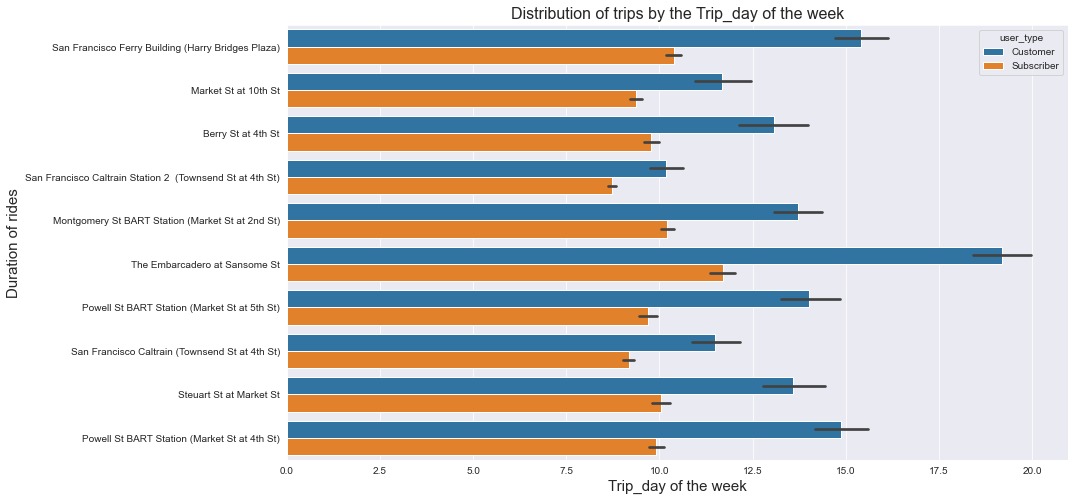

In [98]:
plt.figure(figsize=(14,8))
base_color = sb.color_palette()[1]

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
top_dest_df['Trip_day of the week'] = top_dest_df['Trip_day of the week'].astype(weekdaycat)

sb.barplot(data=top_dest_df, y='end_station_name', x='duration_min', hue='user_type')
plt.xlabel('Trip_day of the week', fontsize=15)
plt.ylabel('Duration of rides', fontsize=15)
plt.title("Distribution of trips by the Trip_day of the week", fontsize=16);

)If you look at the `Embarcadero at Sansome St` location, you'll notice that the station is located in the heart of a fantastic tourist/recreation area, which explains why customer bike excursions take so long... :) 

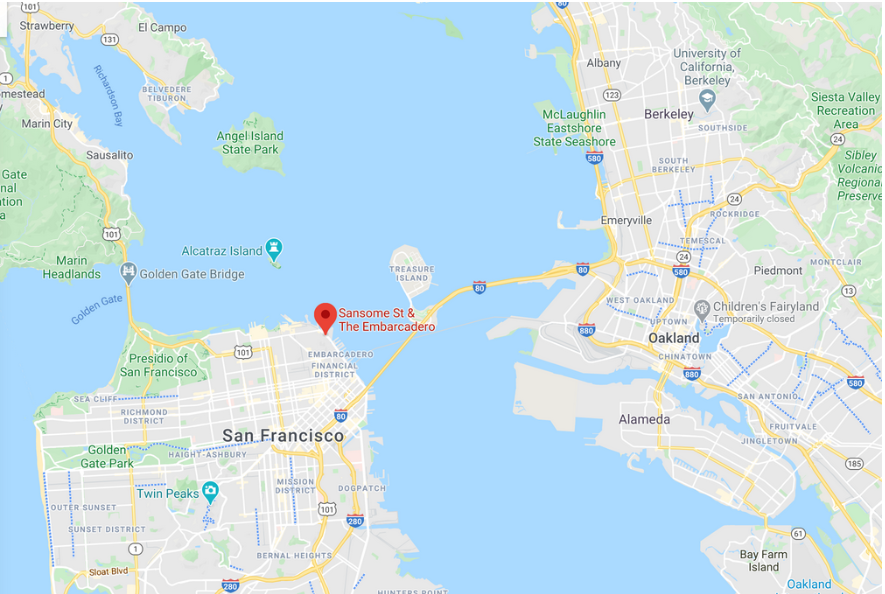

In [99]:
from IPython.display import Image
Image(filename='Embarcadero.png')

Text(0, 0.5, 'Trip Duration in Mins')

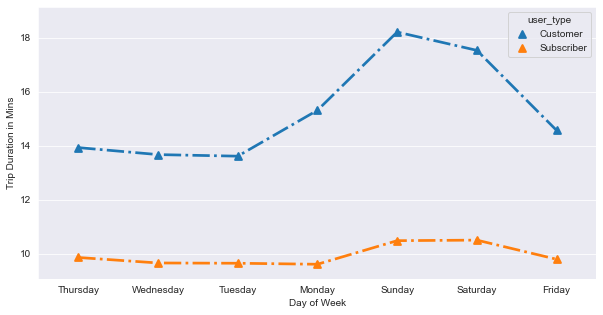

In [100]:
plt.figure(figsize=[10, 5])
sb.pointplot(data=gobikes, x='Trip_day of the week', y='duration_min', hue='user_type', errwidth=0, linestyles='-.'
             ,markers = '^')
plt.xlabel('Day of Week')
plt.ylabel('Trip Duration in Mins')

We notice that: 
- **Both of Users type have a longer trip duration on weekend in relative to their trips during other week days.**
- **Subscribers rent bikes more efficiently as they have a shorter trip duration overall than customers.**
- **It looks like that customers rent bikes for entertainment and fun as they rent it for quite longer duration than subscribers specially on weekend days (Saturday and Sunday)**.

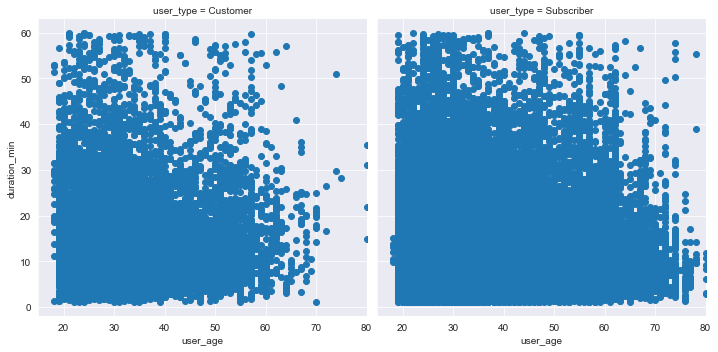

In [101]:
m_var = sb.FacetGrid(data = gobikes, col = 'user_type', height = 5, margin_titles = True)
m_var.map(plt.scatter, 'user_age', 'duration_min')
plt.xlim(15, 80);

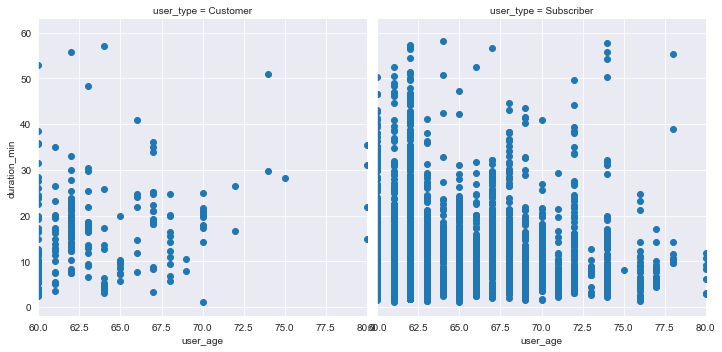

In [102]:
m_var = sb.FacetGrid(data = gobikes, col = 'user_type', height = 5, margin_titles = True)
m_var.map(plt.scatter, 'user_age', 'duration_min')
plt.xlim(60, 80);

We notice that: 
- **Both of Users type have their trips duration decreases as age increases**
- **Subscribers of old age (60-80) have a longer trip duration and larger no of trips from customers.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> after the investigation of the three variables ('Trip_day of the week','duration_min','user_type')
We found that **Both of Users type have a longer trip duration on weekend in relative to their trips during other week days and Subscribers rent bikes more efficiently as they have a shorter trip duration overall than customers.**

### Were there any interesting or surprising interactions between features?

> after the investigation of the three variables ( 'user_type', 'user_age', 'duration_min')
We found that **Both of Users type have their trips duration decreases as age increases and Subscribers of old age (60-80) have a longer trip duration and larger no of trips from customers.**

# Conclusions

#### Discuss some of the relationships you discovered during this part  of the investigation. In terms of looking at your feature(s) of interest, were there any features that complemented each other? 

- Each of these plots clearly supports the overall premise that consumers are more like recreational users, while subscribers are people who use them to commute to work or school: 
  - Subscribers are more likely to rent a bike on weekdays more than double the level of weekdays), and customers are more likely to rent on weekends. 
  - Customers' bike trip duration last roughly twice as long as Subscribers' (18 vs 10 minutes). 
  - Customers' trip duration is significantly higher on weekends. On weekends, the duration is typically 18.5 minutes, which is nearly 10% higher than the top score on a weekday. 
- However, the last step (multivariate explorations) allows us to learn even more about the hourly patterns of use over the course of a week, as well as the distinctions between Customers and Subscribers. 
  - During the weekdays , the distribution of rides for both types of users is heavily influenced by the hour of the day and the day of the week.  
  - Customers primarily utilise the bike service on Saturdays and Sundays from 12 p.m. to 5 p.m., whilst Subscribers are more likely to take a ride during peak hours from Monday to Friday (8-9 AM, 17-18 PM). 

#### Were there any interactions between features that were particularly fascinating or surprising? 

- For both user types, the trip duration declines between 6 and 9 o'clock. 
- In addition, the location of the end destination station contributes as a variable for predicting bike usage; when compared to other destinations, The Embarcadero at Sansome St has the highest trip duration (approximately 30-40%  higher). This is most likely due to the fact that the station is located in a fantastic tourist/recreational location, which explains why customer bike excursions take so long... :) 